In [2]:
 pip install transformers nltk pandas numpy matplotlib seaborn wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# tải lên bộ dữ liệu
news_d = pd.read_csv("/content/train.csv")

In [6]:
print("Shape of News data:", news_d.shape) # đưa ra số hàng , số cột 
print("News data columns", news_d.columns) # đưa ra tên các cột

Shape of News data: (20800, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [7]:
# hiển thị một số hàng đầu tiên trong dataframe df. Mặc định là hiển thị 5 hàng đầu tiên.
news_d.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
# Tính độ dài (số từ) cho mỗi mẫu văn bản sau khi đã chia thành từ riêng biệt.

txt_length = news_d.text.str.split().str.len()
txt_length.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

In [9]:
#độ dài (số từ) của mỗi tiêu đề trong cột "title" 
title_length = news_d.title.str.split().str.len()
title_length.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

1: Unreliable
0: Reliable
Distribution of labels:
1    10413
0    10387
Name: label, dtype: int64


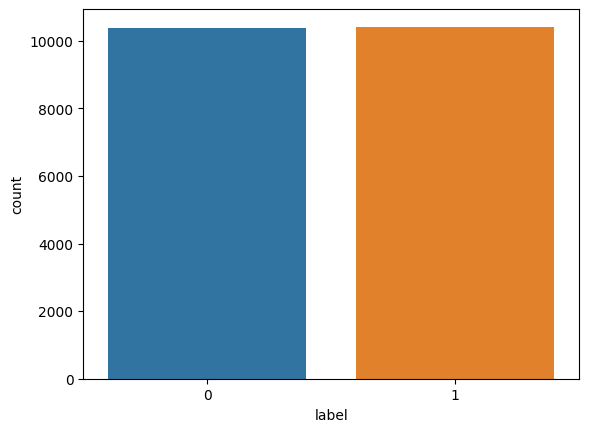

In [10]:
#  hiển thị số lượng mẫu đối với nhãn "1" (Unreliable) và nhãn "0" (Reliable).
sns.countplot(x="label", data=news_d);
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(news_d.label.value_counts());

In [11]:
print(round(news_d.label.value_counts(normalize=True),2)*100);

1    50.0
0    50.0
Name: label, dtype: float64


In [12]:
# các hằng số được sử dụng để clean datasets

column_n = ['id', 'title', 'author', 'text', 'label']
remove_c = ['id','author']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [13]:
# Clean Datasets
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter
# chuyển đổi các từ về dạng gốc (stem) của chúng
ps = PorterStemmer() 
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english') # tải danh sách các từ dừng (stop words) trong tiếng Anh từ thư viện NLTK
stopwords_dict = Counter(stop_words) #  tạo một từ điển đếm (counter) từ danh sách các từ dừng

# xóa các cột không sử dụng
def remove_unused_c(df,column_n=remove_c):
    df = df.drop(column_n,axis=1)
    return df

# đặt các giá trị null bằng None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df
# clean dữ liệu
def clean_dataset(df):
    df = remove_unused_c(df)
    df = null_process(df)
    return df

# loại bỏ các ký tự không cần thiết.
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # loại bỏ các đường dẫn (URL) 
    text = str(text).replace(r'[^\.\w\s]', ' ')  # loại bỏ mọi ký tự không phải là chữ cái, chữ số, dấu chấm và khoảng trắng
    text = str(text).replace('[^a-zA-Z]', ' ') # loại bỏ mọi ký tự không phải là chữ cái.
    text = str(text).replace(r'\s\s+', ' ')  # thay thế nhiều khoảng trắng liên tiếp bằng một khoảng trắng duy nhất.
    text = text.lower().strip() # Dòng này chuyển đổi văn bản thành chữ thường và loại bỏ các khoảng trắng ở đầu và cuối chuỗi.
    #text = ' '.join(text)    
    return text
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text 
    # Kết quả cuối cùng là một chuỗi văn bản đã qua xử lý.

In [14]:

df = clean_dataset(news_d)
# tiền xử lý văn bản 
df["text"] = df.text.apply(nltk_preprocess)
# tiền xử lý tiêu đề
df["title"] = df.title.apply(nltk_preprocess)

In [15]:
# bộ dữ liệu sau khi tiền xử lý
df.head()

,title,text,label
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...,1
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circle roundabout rather...,0
2,truth might get fired,truth might get fired october 29 2016 tension ...,1
3,15 civilian killed single u airstrike identified,video 15 civilian killed single u airstrike id...,1
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six year prison ...,1


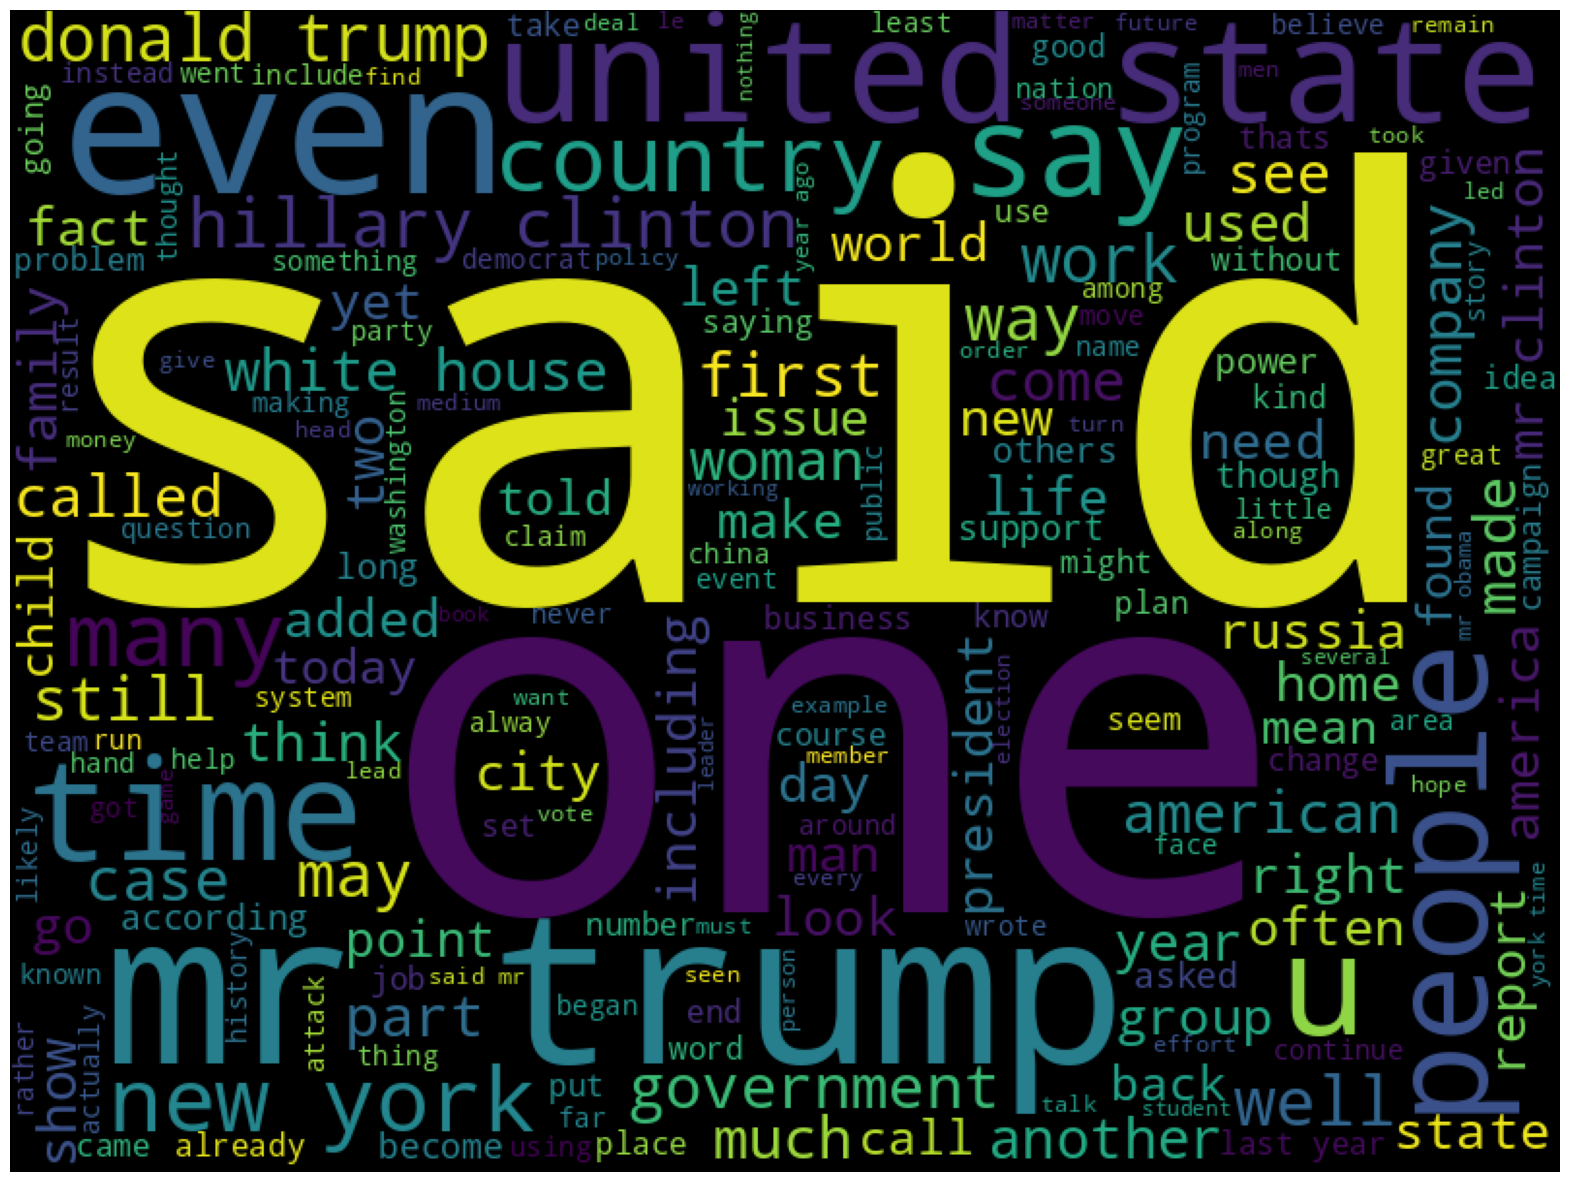

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

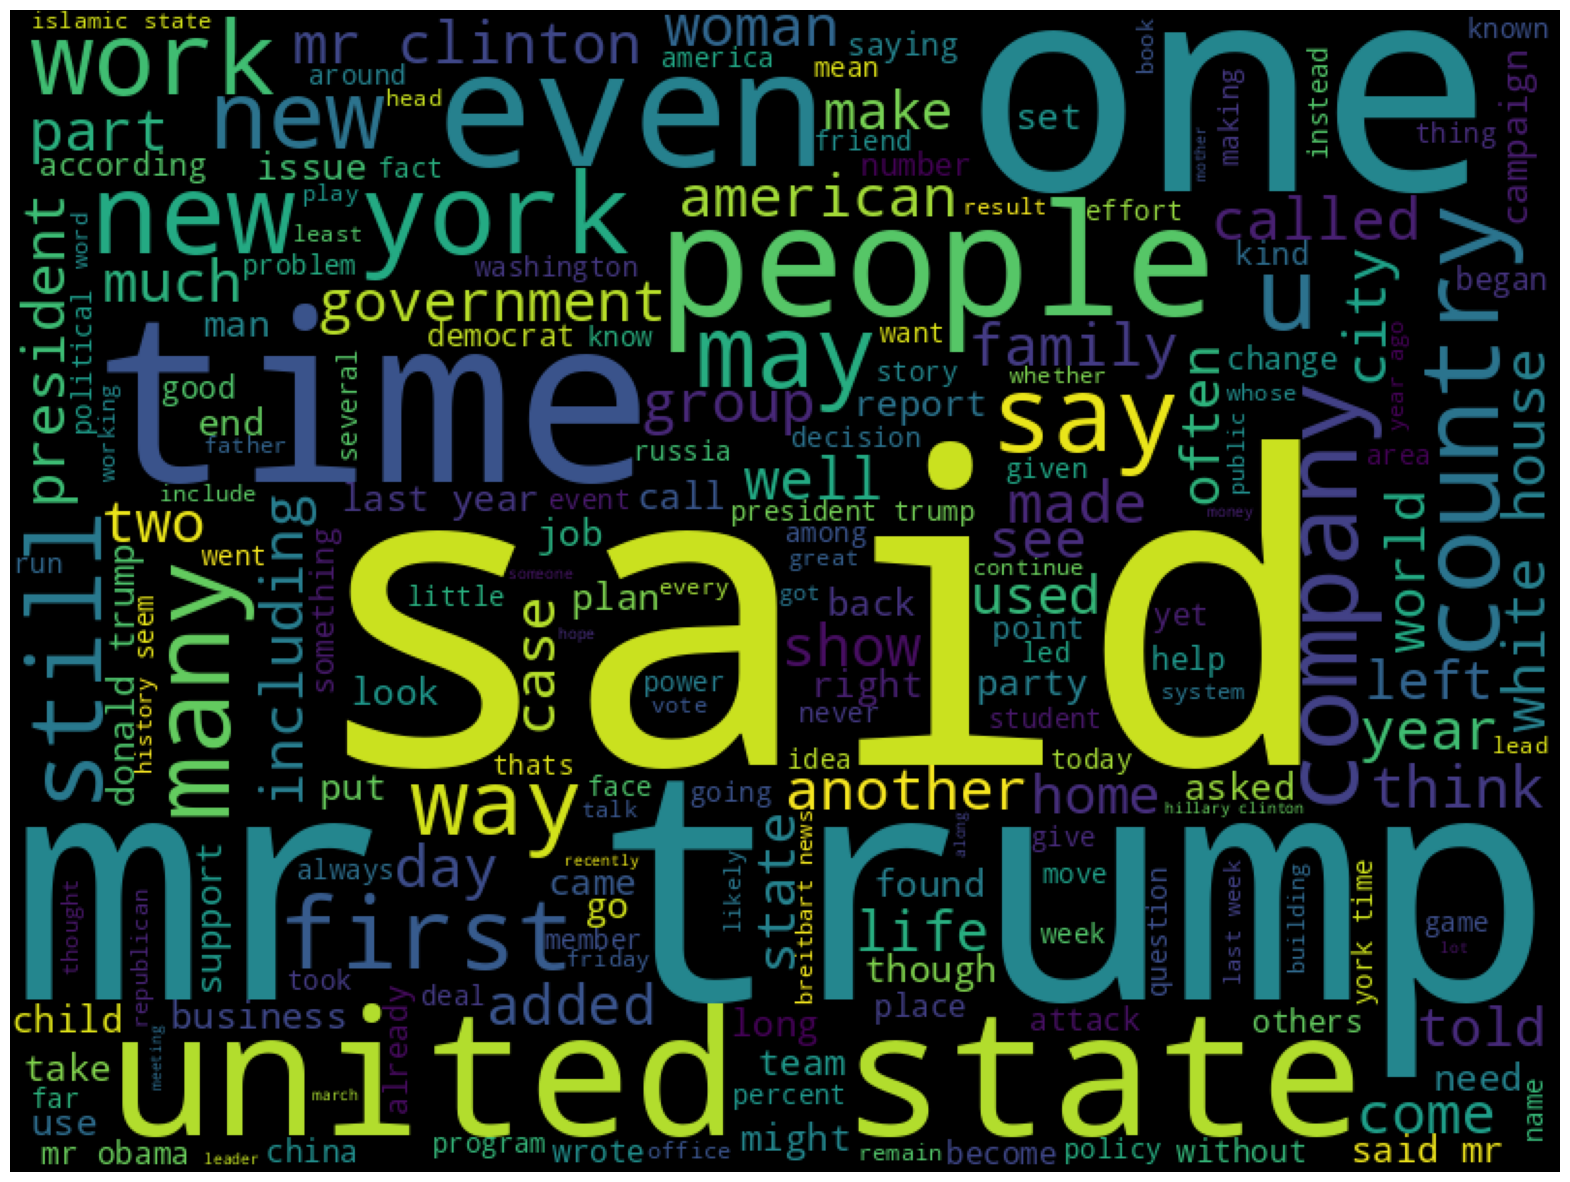

In [17]:
true_n = ' '.join(df[df['label']==0]['text']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

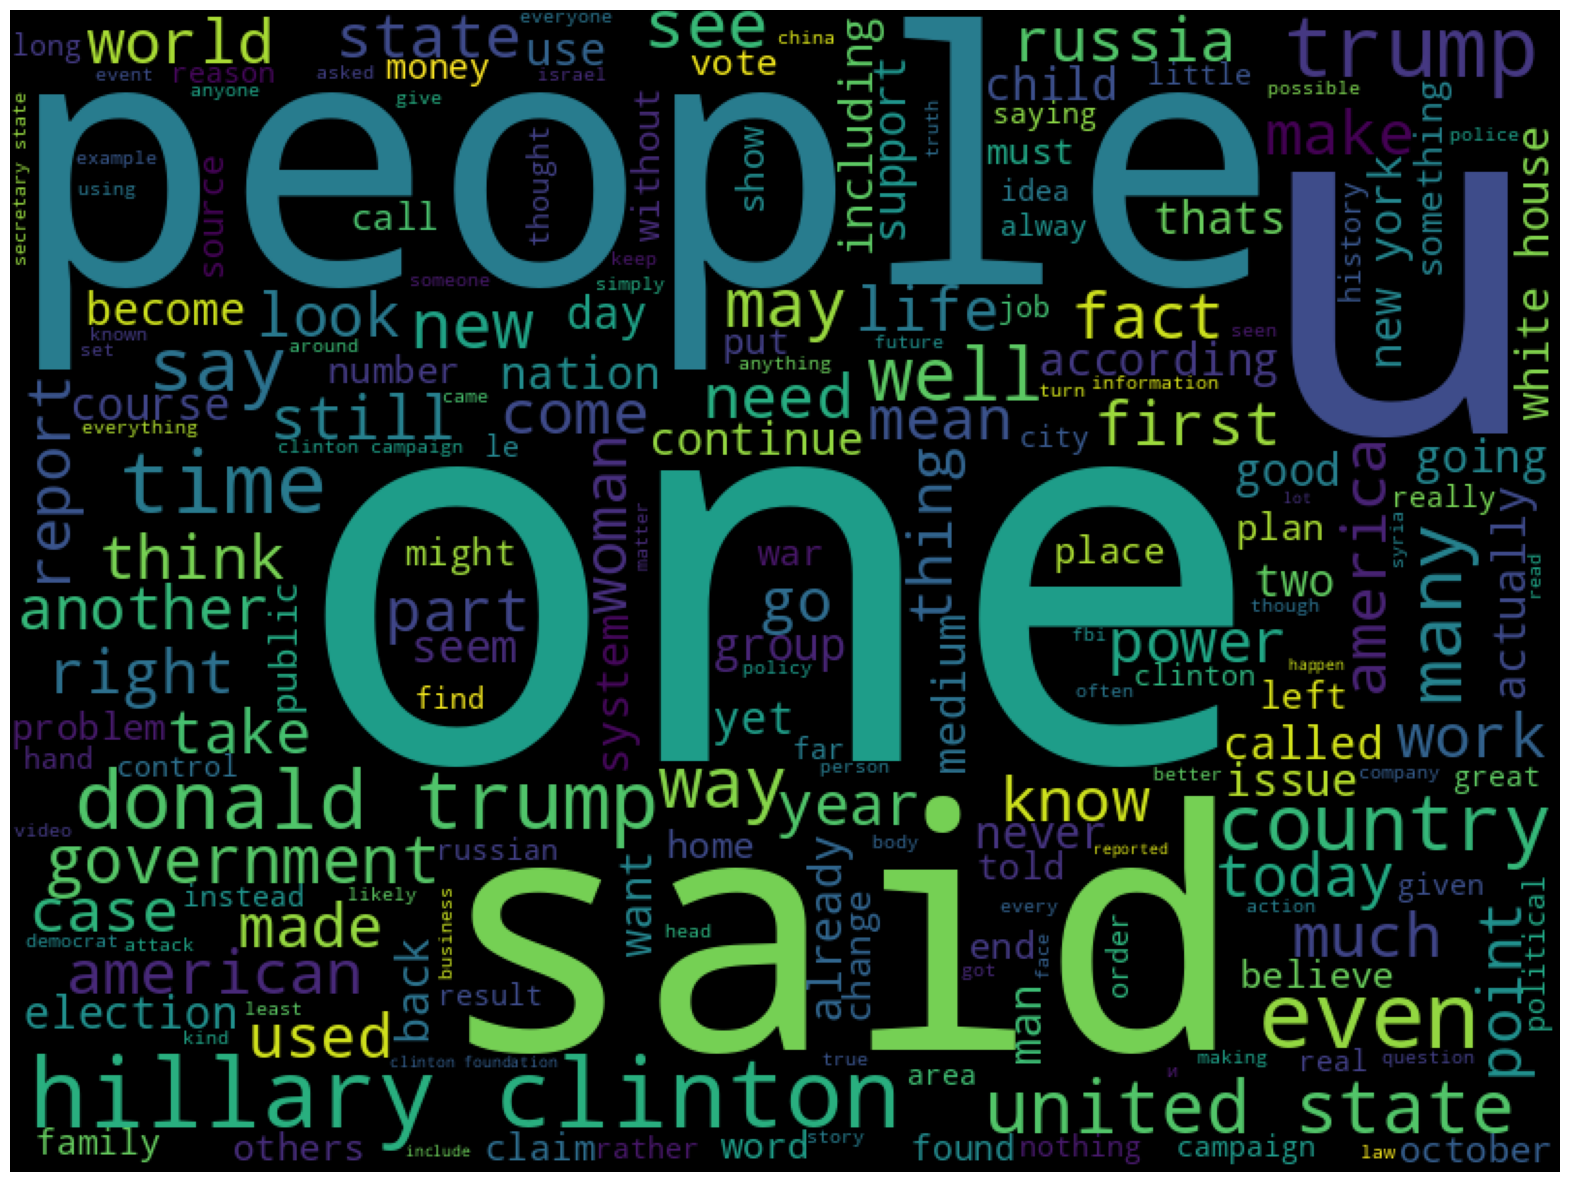

In [18]:
fake_n = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [19]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

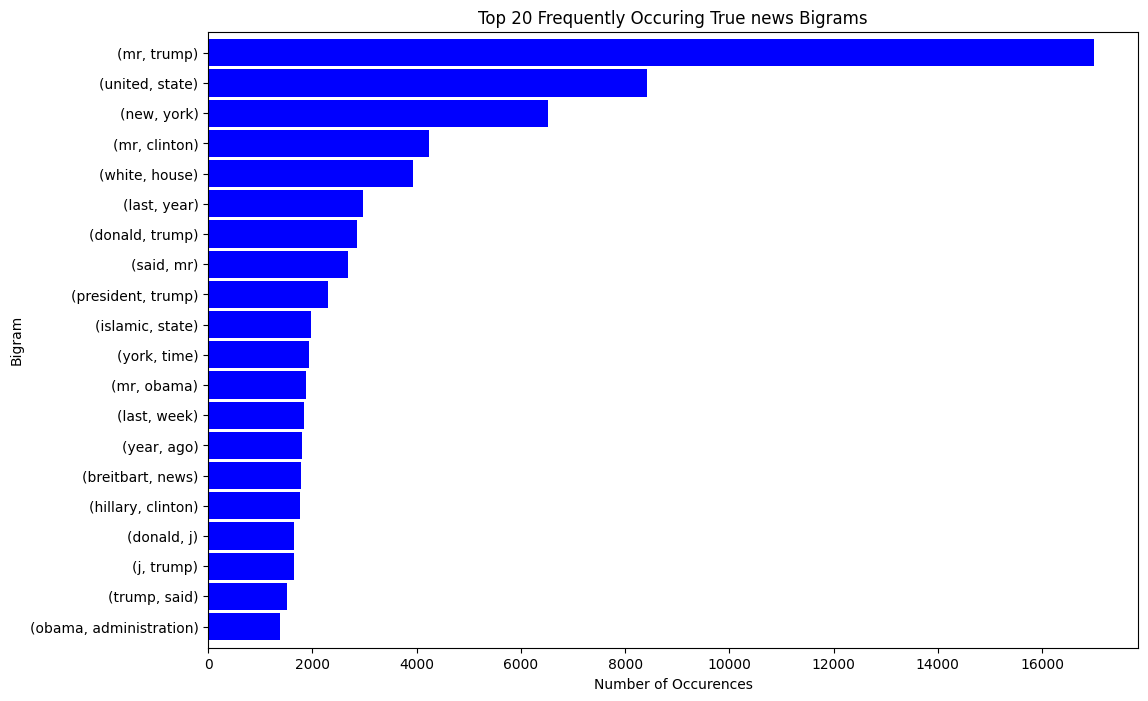

In [20]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

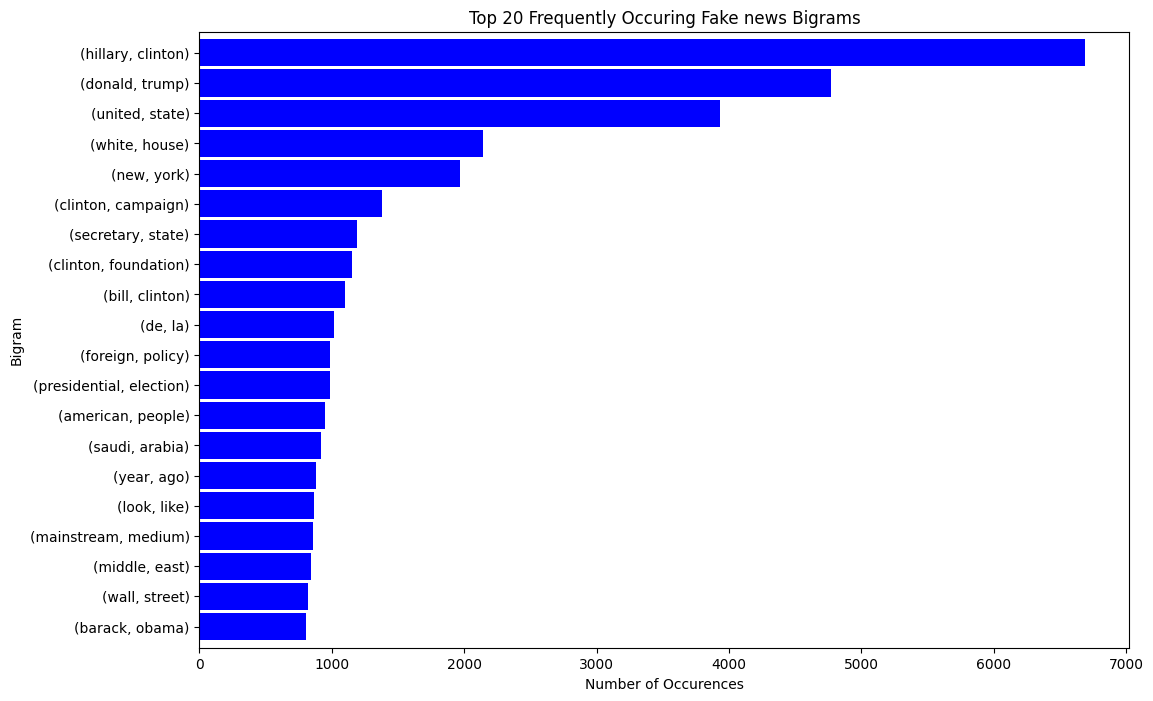

In [21]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

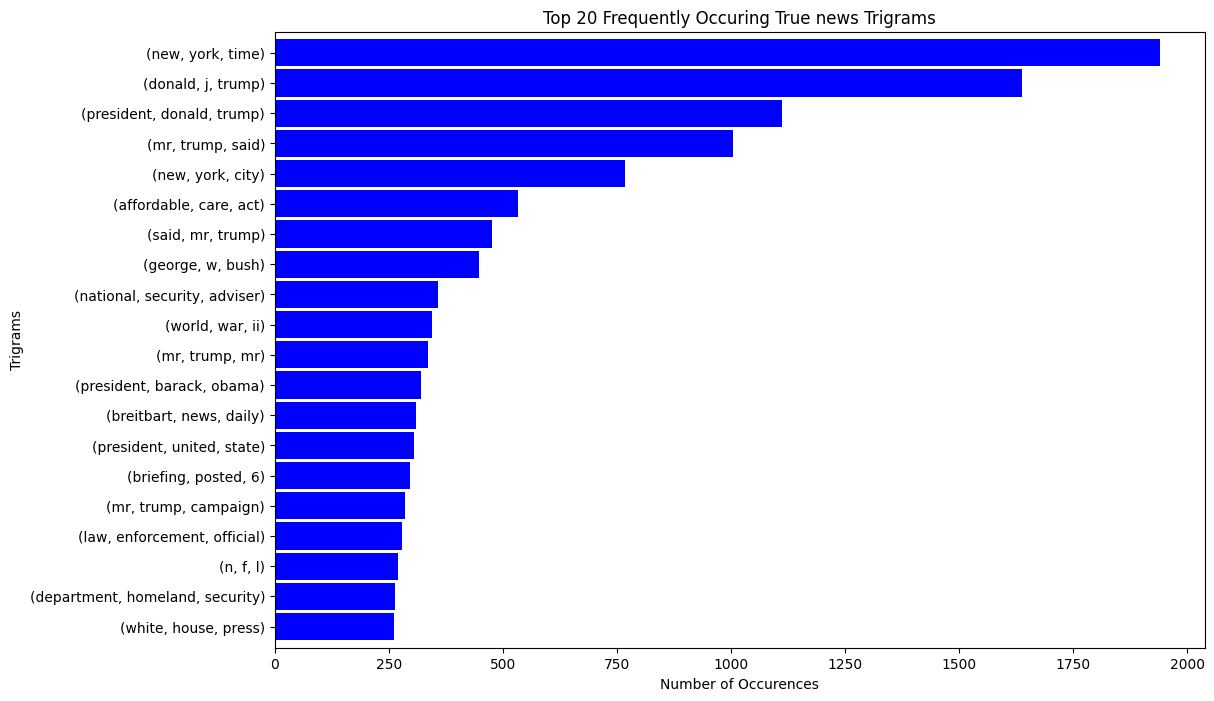

In [22]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Trigrams', "Trigrams", n=3)

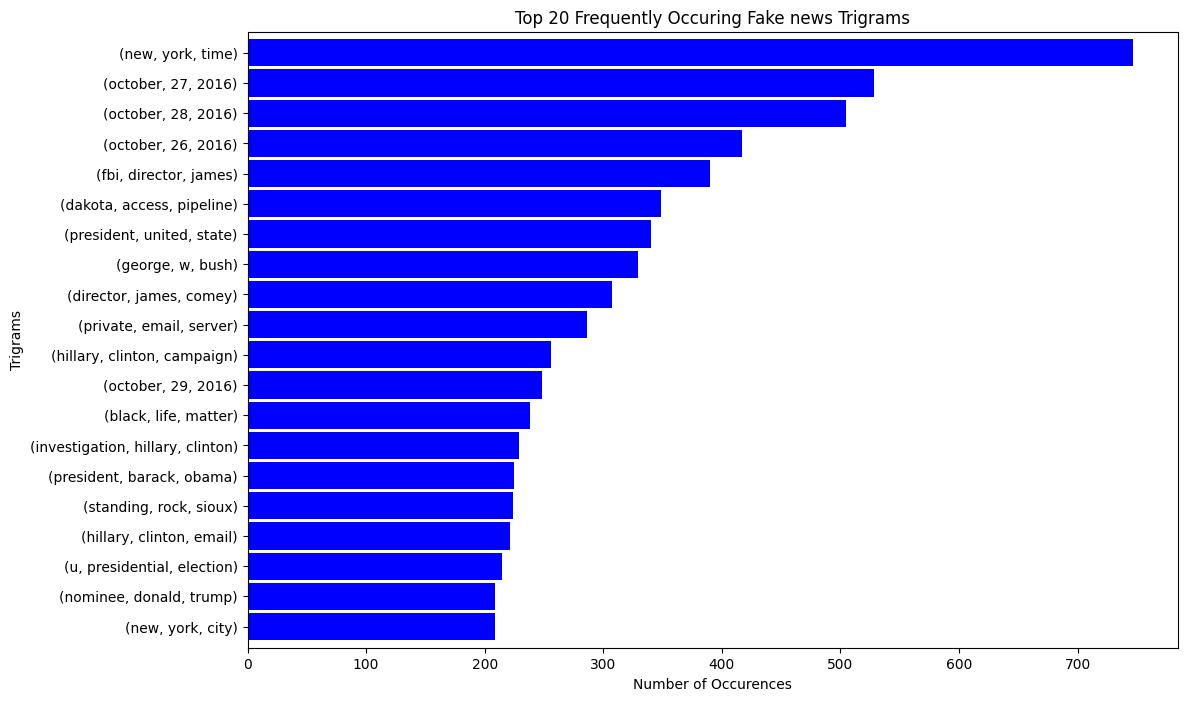

In [23]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

In [24]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split

import random

In [25]:
def set_seed(seed: int):
    """
     Hàm trợ giúp để đảm bảo tính nhất quán trong việc thiết lập seed trong các thư viện "random", "numpy", "torch" và/hoặc "tf" (nếu đã được cài đặt).
    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)

In [26]:
# the model we gonna train, base uncased BERT
# check text classification models here: https://huggingface.co/models?filter=text-classification
model_name = "bert-base-uncased"
# max sequence length for each document/sentence sample
max_length = 512

In [27]:
# load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

In [28]:
news_df = news_d[news_d['text'].notna()]
news_df = news_df[news_df["author"].notna()]
news_df = news_df[news_df["title"].notna()]

In [29]:
def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
  texts = []
  labels = []
  for i in range(len(df)):
    text = df["text"].iloc[i]
    label = df["label"].iloc[i]
    if include_title:
      text = df["title"].iloc[i] + " - " + text
    if include_author:
      text = df["author"].iloc[i] + " : " + text
    if text and label in [0, 1]:
      texts.append(text)
      labels.append(label)
  return train_test_split(texts, labels, test_size=test_size)

train_texts, valid_texts, train_labels, valid_labels = prepare_data(news_df)

In [30]:
print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))

14628 14628
3657 3657


In [31]:
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

In [32]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [33]:
# load the model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [34]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }

In [35]:
training_args = TrainingArguments(
output_dir='./results',         # thư mục lưu trữ kết quả
num_train_epochs=1,             # tổng số epoch huấn luyện
per_device_train_batch_size=10, # kích thước batch cho mỗi thiết bị trong quá trình huấn luyện
per_device_eval_batch_size=20,  # kích thước batch cho quá trình đánh giá
warmup_steps=100,               # số lượng bước khởi đầu để điều chỉnh tốc độ học
logging_dir='./logs',           # thư mục lưu trữ các file log
load_best_model_at_end=True,    # tải mô hình tốt nhất khi hoàn thành huấn luyện (độ đo mặc định là loss)
# tuy nhiên, bạn có thể chỉ định đối số metric_for_best_model để thay đổi thành độ chính xác hoặc độ đo khác
logging_steps=200,              # ghi log và lưu trọng số sau mỗi logging_steps bước
save_steps=200,
evaluation_strategy="steps",    # đánh giá sau mỗi logging_steps bước
)


In [36]:
trainer = Trainer(
    model=model,                     # mô hình Transformers đã được khởi tạo để được huấn luyện
    args=training_args,              # các tham số huấn luyện, đã được định nghĩa ở trên
    train_dataset=train_dataset,     # tập dữ liệu huấn luyện
    eval_dataset=valid_dataset,      # tập dữ liệu đánh giá
    compute_metrics=compute_metrics, # hàm tính các độ đo quan trọng
)

In [37]:

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
200,0.250800,0.101590,0.982773
400,0.025300,0.015046,0.998086
600,0.027600,0.094036,0.986328
800,0.024700,0.014806,0.996445
1000,0.016200,0.017469,0.997539
1200,0.013000,0.007273,0.998906
1400,0.005700,0.005586,0.999180


TrainOutput(global_step=1463, training_loss=0.04985751469332473, metrics={'train_runtime': 2390.3099, 'train_samples_per_second': 6.12, 'train_steps_per_second': 0.612, 'total_flos': 3848788517806080.0, 'train_loss': 0.04985751469332473, 'epoch': 1.0})

In [38]:
trainer.evaluate()

{'eval_loss': 0.005585969891399145,
 'eval_accuracy': 0.9991796554552912,
 'eval_runtime': 123.3895,
 'eval_samples_per_second': 29.638,
 'eval_steps_per_second': 1.483,
 'epoch': 1.0}

In [39]:
# saving the fine tuned model & tokenizer
model_path = "fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('fake-news-bert-base-uncased/tokenizer_config.json',
 'fake-news-bert-base-uncased/special_tokens_map.json',
 'fake-news-bert-base-uncased/vocab.txt',
 'fake-news-bert-base-uncased/added_tokens.json',
 'fake-news-bert-base-uncased/tokenizer.json')

In [40]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [41]:
real_news = """
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

In [42]:
get_prediction(real_news, convert_to_label=True)

'reliable'

In [43]:
real_news=""" Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times"""

In [44]:
get_prediction(real_news,convert_to_label=True)

'reliable'

In [45]:
get_prediction("""Trump is USA's antique hero. Clinton will be next president""",convert_to_label=True)

'fake'

In [46]:
get_prediction("""Weekly Featured Profile – Randy Shannon",Trevor Loudon,"You are here: Home / *Articles of the Bound* / Weekly Featured Profile – Randy Shannon Weekly Featured Profile – Randy Shannon October 31, 2016, 7:21 am by Trevor Loudon Leave a Comment 0 
KeyWiki.org Randy Shannon 
Randy Shannon is a Beaver County , Pennsylvania Democratic Party activist. “A Democratic victory in 2016 with a bigger progressive caucus can tax Wall Street, end austerity and discrimination, and put the nation to work building the solar infrastructure we desperately need.” 
“We need progressives like Sanders, who support working families, running for President, for Senate, and for Congress wherever possible,” said Randy Shannon , convener of the Sanders for President PA Exploratory Committee. 
Randy Shannon was a student leader in the 1960’s at Duke University.""",convert_to_label=True)

'fake'

In [3]:
news="""Trump is USA's antique hero. Clinton will be next president"""
get_prediction(news,convert_to_label=True)

NameError: name 'get_prediction' is not defined

In [23]:
from transformers import BertTokenizerFast, BertForSequenceClassification
import torch
max_length = 512
model_name="fake-news-bert-base-uncased"
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)


In [24]:

def get_prediction(text, convert_to_label=False):
    # Chuẩn bị văn bản thành chuỗi token hóa
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cpu")
    # Thực hiện dự đoán trên mô hình
    outputs = model(**inputs)
    # Lấy xác suất đầu ra bằng cách sử dụng softmax
    probs = torch.softmax(outputs.logits, dim=1)
    # Thực hiện argmax để lấy nhãn dự đoán
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
        return d[int(probs.argmax())]
    else:
        return int(probs.argmax())

In [25]:
real_news = """
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

In [26]:
get_prediction(real_news, convert_to_label=True)

'reliable'

In [27]:
news="""Trump is USA's antique hero. Clinton will be next president"""
get_prediction(news,convert_to_label=True)

'fake'